## ASSIGNMENT 

## Bagging & Boosting KNN & Stacking 

### Q1.  What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective? 

#### A1. Fundamental Idea Behind Ensemble Techniques
#### The core concept of ensemble techniques in machine learning is to combine multiple models, often referred to as weak learners, to produce a single, more accurate model. This approach leverages the strengths of various models to improve overall performance and generalization. By aggregating diverse models, ensemble methods can reduce variance and/or bias, leading to better predictive accuracy compared to individual models. Common ensemble strategies include bagging, boosting, and stacking.

#### Bagging (Bootstrap Aggregating)
#### Approach: Bagging involves training multiple models independently on different bootstrap samples (random samples with replacement) of the training dataset. Each model is trained in parallel, and their predictions are aggregated (e.g., through majority voting for classification or averaging for regression) to produce the final output. This method helps to reduce variance and avoid overfitting, particularly useful for high-variance models like decision trees. 

#### Objective: The primary goal of bagging is to reduce variance. By training models on different subsets of data, bagging ensures that the errors made by individual models are less correlated, leading to a more stable and robust overall prediction.


#### Boosting
#### Approach: Boosting, on the other hand, is an iterative technique where models are trained sequentially. Each new model focuses on correcting the errors made by the previous models by re-weighting the training instances. Misclassified instances receive higher weights, prompting the subsequent model to pay more attention to these difficult cases. This process continues until a predefined number of models is reached. 

#### Objective: The main objective of boosting is to reduce bias (and often variance) by combining weak learners into a strong learner. Boosting typically yields higher accuracy but can be more prone to overfitting if not regularized properly. 

### Q2. Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process. 

#### A2. A single decision tree tends to overfit — it can learn very specific patterns and noise from the training data, leading to poor generalization on unseen data.

#### The Random Forest Classifier, on the other hand, is an ensemble of many decision trees built on random subsets of data and features. By combining these trees, it reduces overfitting and improves accuracy.

#### Hyperparameter = n_estimators Number of trees in the forest.

#### Role & Effect:
#### 1. More trees = more stable and accurate results (up to a point). 
#### 2. Too few trees → high variance (overfitting). 
#### 3. Too many trees → higher computation cost but not overfitting.

#### Hyperparameter = max_features Number of features randomly selected at each split.

#### Role & Effect:
#### 1. Smaller value → higher randomness → less correlation between trees → less overfitting. 
#### 2. Larger value → trees more similar → more overfitting. Typical defaults: √(n_features) for classification, n_features/3 for regression.

### Q3.  What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case. 

#### A3. Stacking (or Stacked Generalization) is an ensemble technique where multiple different models (base learners) are trained on the same dataset, and their predictions are combined by a meta-model (meta-learner) to produce the final output.

#### How It Works
#### Level 0 — Base Learners Train several diverse models (e.g., Decision Tree, Logistic Regression, KNN, SVM) on the training data.

#### Level 1 — Meta Learner (Blender)

#### Collect predictions from all base learners (usually using cross-validation to avoid bias).

#### Feed these predictions as input features to a meta-model (e.g., Logistic Regression, Random Forest).

#### The meta-model learns how to best combine them to make the final prediction.

#### Simple Example Use Case
#### Problem: Predict whether a customer will default on a loan (classification problem).

#### Approach:

#### 1.Train Level-0 base models: Logistic Regression → captures linear patterns Decision Tree → captures non-linear interactions KNN → captures local neighborhood structure

#### 2.Train Level-1 meta-learner: A Logistic Regression model that takes the predictions from the three models as input features.

#### Outcome: The meta-learner learns to give more weight to whichever base model performs better for certain types of data, improving accuracy and generalization.

### Q4. :What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

#### A4. In Random Forest, each decision tree is trained on a bootstrap sample — a random sample of the training data with replacement.Because of this sampling method, about 63% of the training data points are used for training each tree, and the remaining ~37% of data points are not used for that tree.

#### Why OOB Score is Useful:

#### 1. Acts as a Built-in Cross-Validation Since every sample gets predicted by multiple trees that didn’t see it during training, the OOB score provides an unbiased estimate of generalization performance, similar to k-fold cross-validation.
#### 2. Saves Data and Time No need to set aside a separate validation or test set. All training samples are utilized efficiently — some for training and others for validation.
#### 3. Early Performance Indicator You can monitor model performance as trees are added — OOB score often stabilizes as the model converges.

### Q5. Compare AdaBoost and Gradient Boosting in terms of: ● How they handle errors from weak learners ● Weight adjustment mechanism ● Typical use cases

#### A5. Boosting methods are ensemble techniques that combine multiple weak learners to form a strong predictive model. AdaBoost and Gradient Boosting are two popular approaches, each with distinct mechanisms. Here’s a detailed comparison across the requested dimensions:

#### 1. Handling Errors from Weak Learners
#### AdaBoost:

#### Focuses on misclassified instances in each round. After training a weak learner, AdaBoost increases the weights of the incorrectly predicted samples so that the next weak learner focuses more on difficult cases.It adapts to errors iteratively, attempting to correct mistakes of prior learners.Sensitive to noisy data or outliers, as large weights can excessively bias subsequent learners toward noisy examples.

#### Gradient Boosting:

#### Treats boosting as a numerical optimization problem. Each weak learner is trained to approximate the negative gradient of a specified loss function (e.g., squared error, log-loss) with respect to the current ensemble predictions.Errors from weak learners are incorporated additively in a gradient descent manner, not via instance reweighting.Offers flexibility to model different types of errors using different loss functions; more robust regularization options reduce overfitting to noise.

#### 2. Weight Adjustment Mechanism
#### AdaBoost: Uses a sample-level weighting scheme. Initially, all samples have equal weight. After each weak learner: Compute the learner’s error rate ϵt.

#### Determine the learner weight αt=1/2ln1−ϵt/ϵt

#### Update sample weights: increase for misclassified samples, decrease for correctly classified samples. The final prediction is a weighted majority vote (classification) or sum (regression in some variants) of weak learners.

#### Gradient Boosting:

#### Uses residual fitting rather than explicit sample weighting. Each weak learner predicts the negative gradient of the loss function at the current predictions: f m ( x )
#### − ∂ L ( y , F ( x ) ) ∂ F ( x ) ∣ F ( x )
#### F m − 1 ( x ) f m(x)=− ∂F(x) ∂L(y,F(x))
#### F(x)=F m−1(x)

#### Learners are combined with a learning rate η η (shrinkage) controlling the contribution of each learner: F m ( x )
#### F m − 1 ( x ) + η f m ( x ) F m​(x)=F m−1​(x)+ηf m​(x) No explicit reweighting of training samples; adjustment is embedded in gradient-directed additive update

#### 3. Typical Use Cases:

#### AdaBoost is a great choice when you need a simple, fast-to-train model for datasets with minimal noise. It performs well for binary classification problems where identifying and correcting misclassified instances is critical. Its straightforward implementation and focus on weak learners make it an excellent option for quick prototyping.  

#### Gradient Boosting is ideal for tasks requiring complex models capable of capturing intricate patterns in data. It is better suited for noisy or real-world datasets, where robustness is essential. Its flexibility with loss functions makes it suitable for both regression and classification tasks, especially when precision is required.

### Q6: Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

#### A6. CatBoost performs exceptionally well on categorical features without requiring extensive preprocessing due to several innovative design choices that differentiate it from traditional gradient boosting algorithms:

#### Native Categorical Handling via Ordered Target Statistics:
#### CatBoost converts categorical features into numerical representations using ordered target statistics rather than one-hot encoding or arbitrary embeddings. For a categorical feature, it calculates the mean target value associated with each category, but crucially, this is done in an ordered fashion to prevent target leakage — i.e., the model inadvertently learning from future information. This allows high-cardinality features to be used directly without overfitting.

#### Combinatorial Feature Generation:
#### CatBoost can automatically generate combinations of categorical features, effectively creating interaction features that capture predictive relationships, without manual preprocessing. These combinations are used to enrich the feature space, improving model expressiveness while still controlling for overfitting.

#### Ordered Boosting to Reduce Prediction Shift:
#### Traditional gradient boosting can suffer from prediction shift, where early trees' residuals are biased because they see the whole dataset in computing splits. CatBoost introduces ordered boosting, which processes data in permutations to ensure that each training instance is evaluated without bias from itself, particularly important for categorical features. This mechanism allows more stable and accurate handling of categorical variables.

### Q7.  KNN Classifier Assignment: Wine Dataset Analysis with Optimization 
### Task: 
### 1. Load the Wine dataset (sklearn.datasets.load_wine()). 
### 2. Split data into 70% train and 30% test. 
### 3. Train a KNN classifier (default K=5) without scaling and evaluate using: 
### a. Accuracy 
### b. Precision, Recall, F1-Score (print classification report) 
### 4. Apply StandardScaler, retrain KNN, and compare metrics. 
### 5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric (Euclidean, Manhattan). 
### 6. Train the optimized KNN and compare results with the unscaled/scaled versions.

In [1]:
#A7.
# Step 1: Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Step 3: Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Train KNN (default K=5) without scaling
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

print("🔹 Without Scaling (K=5)")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))

# Step 5: Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain KNN on scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n🔹 With StandardScaler (K=5)")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

# Step 6: Use GridSearchCV to find best K and distance metric
param_grid = {
    'n_neighbors': list(range(1, 21)),          # Test K=1 to 20
    'metric': ['euclidean', 'manhattan']        # Test distance metrics
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("\n🔹 Best Parameters from Grid Search:")
print(grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Step 7: Train optimized KNN and evaluate
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\n🔹 Optimized KNN (Scaled Data)")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

🔹 Without Scaling (K=5)
Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


🔹 With StandardScaler (K=5)
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


🔹 Best Parameters from Grid Search:
{'metric': 'euclidean', 'n_neighbors': 11}
Best CV Accuracy: 0.9756666666666666

🔹 Optimiz

### Q8.  PCA + KNN with Variance Analysis and Visualization 
### Task: 
### 1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()). 
### 2. Apply PCA and plot the scree plot (explained variance ratio). 
### 3. Retain 95% variance and transform the dataset. 
### 4. Train KNN on the original data and PCA-transformed data, then compare accuracy. 
### 5. Visualize the first two principal components using a scatter plot (color by class). 

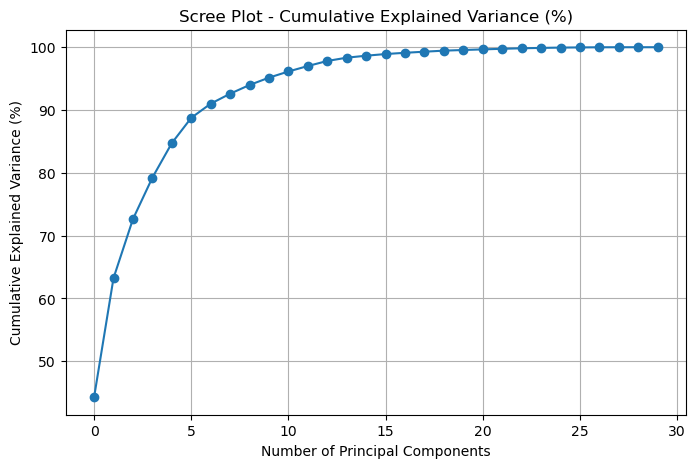

Number of components retained (95% variance): 10

🔹 KNN Performance Comparison:
Original Scaled Data Accuracy: 0.9708
PCA-Reduced Data Accuracy (95% variance): 0.9474


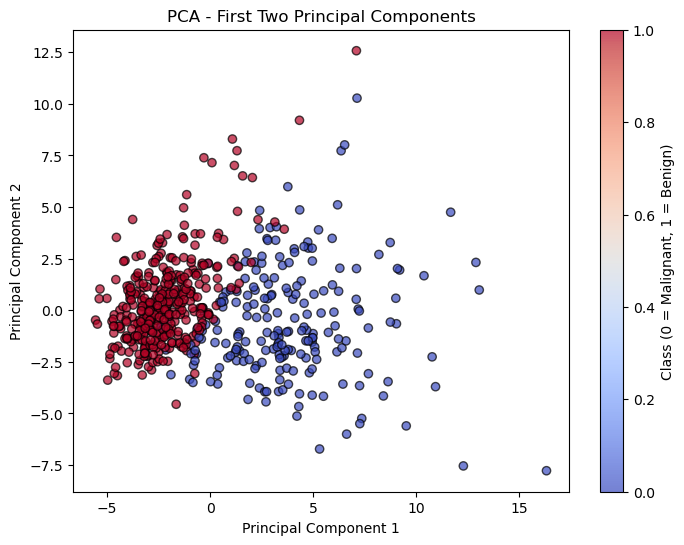

In [3]:
#A8.
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 2: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 3: Scale features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA (without specifying components to get variance info)
pca = PCA()
pca.fit(X_scaled)

# Step 5: Plot Scree Plot (Explained Variance Ratio)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.title("Scree Plot - Cumulative Explained Variance (%)")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.grid(True)
plt.show()

# Step 6: Retain 95% variance
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)
print(f"Number of components retained (95% variance): {pca_95.n_components_}")

# Step 7: Split data (train/test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Step 8: Train KNN on original scaled data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_orig = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_orig)

# Step 9: Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)
y_pred_pca = knn_pca.predict(X_pca_test)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("\n🔹 KNN Performance Comparison:")
print(f"Original Scaled Data Accuracy: {acc_original:.4f}")
print(f"PCA-Reduced Data Accuracy (95% variance): {acc_pca:.4f}")

# Step 10: Visualize first two principal components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("PCA - First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Class (0 = Malignant, 1 = Benign)')
plt.show()

### Q9. :KNN Regressor with Distance Metrics and K-Value Analysis 
### Task: 
### 1. Generate a synthetic regression dataset (sklearn.datasets.make_regression(n_samples=500, n_features=10)). 
### 2. Train a KNN regressor with: 
### a. Euclidean distance (K=5) 
### b. Manhattan distance (K=5) 
### c. Compare Mean Squared Error (MSE) for both. 
### 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

🔹 KNN Regression (K=5) Comparison:
Euclidean Distance MSE : 4803.9056
Manhattan Distance MSE : 5210.2258


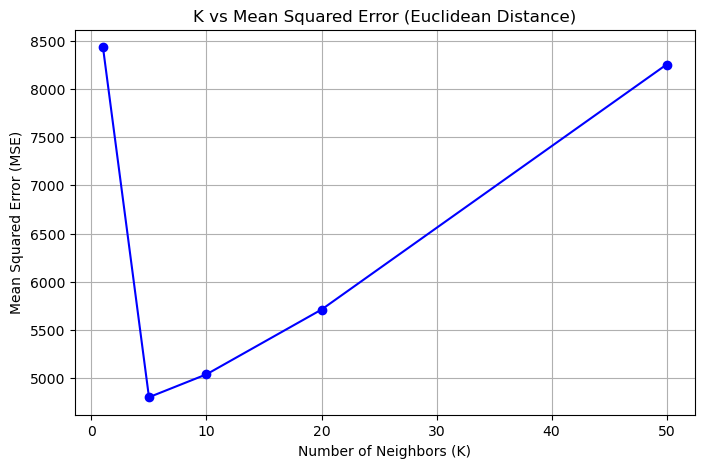

In [4]:
#A9. # Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3a: Train KNN Regressor (Euclidean distance, K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# Step 3b: Train KNN Regressor (Manhattan distance, K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("🔹 KNN Regression (K=5) Comparison:")
print(f"Euclidean Distance MSE : {mse_euclidean:.4f}")
print(f"Manhattan Distance MSE : {mse_manhattan:.4f}")

# Step 4: K vs MSE Analysis
K_values = [1, 5, 10, 20, 50]
mse_scores = []

for k in K_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))

# Step 5: Plot K vs MSE
plt.figure(figsize=(8,5))
plt.plot(K_values, mse_scores, marker='o', linestyle='-', color='b')
plt.title("K vs Mean Squared Error (Euclidean Distance)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()


 ### Q10. KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data 
### Task: 
### 1. Load the Pima Indians Diabetes dataset (contains missing values). 
### 2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values. 
### 3. Train KNN using: 
### a. Brute-force method 
### b. KD-Tree 
### c. Ball Tree 
### 4. Compare their training time and accuracy. 
### 5. Plot the decision boundary for the best-performing method (use 2 most important features).

Dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values before imputation:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                 

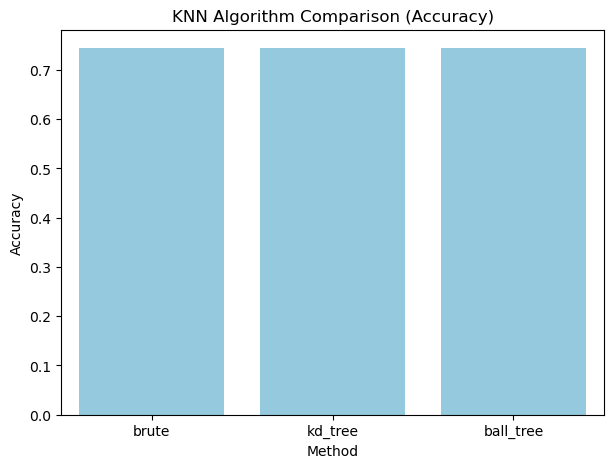

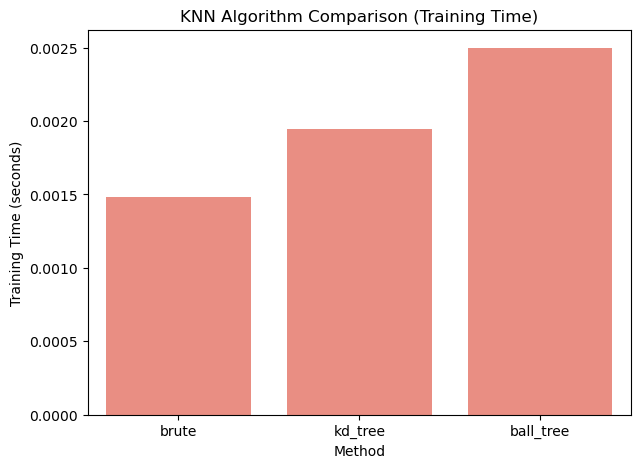


Best-performing method: BRUTE
Top 2 features: ['Glucose', 'Insulin']


<Figure size 800x600 with 0 Axes>

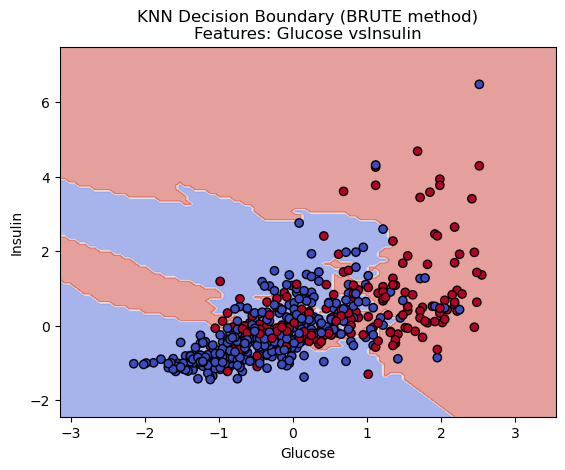

In [7]:
#A10.
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# Step 2: Load the Pima Indians Diabetes dataset
# Dataset URL (from UCI Machine Learning Repository)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
df = pd.read_csv(url, names=columns)

print("Dataset shape:", df.shape)
print(df.head())

# Step 3: Handle missing values — replace zeros with NaN where appropriate
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

print("\nMissing values before imputation:")
print(df.isna().sum())

# Step 4: KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df.drop(columns=['Outcome'])), columns=df.columns[:-1])
df_imputed['Outcome'] = df['Outcome']

print("\nMissing values after imputation:")
print(df_imputed.isna().sum())

# Step 5: Train-test split
X = df_imputed.drop(columns=['Outcome'])
y = df_imputed['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features (KNN is distance-based)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train KNN using different algorithms and compare performance
methods = ['brute', 'kd_tree', 'ball_tree']
results = []

for method in methods:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)

    start_time = time.time()
    knn.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time

    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    results.append((method, acc, train_time))
    print(f"\n🔹 {method.upper()} Method:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Training Time: {train_time:.4f} seconds")

# Step 7: Compare results
results_df = pd.DataFrame(results, columns=['Method', 'Accuracy', 'Train_Time'])
print("\nPerformance Comparison:")
print(results_df)

# Step 8: Plot training time vs accuracy
plt.figure(figsize=(7,5))
sns.barplot(data=results_df, x='Method', y='Accuracy', color='skyblue')
plt.title("KNN Algorithm Comparison (Accuracy)")
plt.ylabel("Accuracy")
plt.show()

plt.figure(figsize=(7,5))
sns.barplot(data=results_df, x='Method', y='Train_Time', color='salmon')
plt.title("KNN Algorithm Comparison (Training Time)")
plt.ylabel("Training Time (seconds)")
plt.show()

# Step 9: Plot Decision Boundary for best-performing method (using top 2 features)
best_method = results_df.loc[results_df['Accuracy'].idxmax(), 'Method']
print(f"\nBest-performing method: {best_method.upper()}")

# Select two most important features (based on correlation with Outcome)
corr = df_imputed.corr()['Outcome'].abs().sort_values(ascending=False)
top2_features = corr.index[1:3]
print("Top 2 features:", list(top2_features))

X2 = df_imputed[list(top2_features)]
y2 = df_imputed['Outcome']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42, 
                                                        stratify=y2)
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
knn_best.fit(X2_train_scaled, y2_train)

# Decision boundary plot
plt.figure(figsize=(8,6))
DecisionBoundaryDisplay.from_estimator(
    knn_best, X2_train_scaled, response_method="predict", cmap='coolwarm', alpha=0.5
)
plt.scatter(X2_train_scaled[:, 0], X2_train_scaled[:, 1], c=y2_train, cmap='coolwarm', edgecolor='k')
plt.title(f"KNN Decision Boundary ({best_method.upper()} method)\nFeatures: {top2_features[0]} vs{top2_features[1]}")
plt.xlabel(top2_features[0])
plt.ylabel(top2_features[1])
plt.show()